# Package Import

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd

# Reading the dataset

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,letter_slant,line_slant,margin_slope,letter_size,word_spacing,personality
0,-2.0,1.0,1.4,156.6,51.5,Agreeableness
1,-6.0,2.8,6.8,56.7,28.0,Agreeableness
2,-11.0,9.6,15.3,486.2,22.0,Agreeableness
3,0.0,1.0,-28.1,421.2,14.0,Agreeableness
4,-7.0,6.1,-21.5,213.9,16.5,Agreeableness


In [4]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  197 non-null    float64
 1   line_slant    197 non-null    float64
 2   margin_slope  197 non-null    float64
 3   letter_size   197 non-null    float64
 4   word_spacing  197 non-null    float64
 5   personality   197 non-null    object 
dtypes: float64(5), object(1)
memory usage: 9.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  24 non-null     float64
 1   line_slant    24 non-null     float64
 2   margin_slope  24 non-null     float64
 3   letter_size   24 non-null     float64
 4   word_spacing  24 non-null     float64
 5   personality   24 non-null     object 
dtypes: float64(5), object(1)
memory usage: 1.3+ 

In [5]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

letter_slant    0
line_slant      0
margin_slope    0
letter_size     0
word_spacing    0
personality     0
dtype: int64
letter_slant    0
line_slant      0
margin_slope    0
letter_size     0
word_spacing    0
personality     0
dtype: int64


In [6]:
train_data = train_data.dropna(axis=0)
test_data = test_data.dropna(axis=0)
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  197 non-null    float64
 1   line_slant    197 non-null    float64
 2   margin_slope  197 non-null    float64
 3   letter_size   197 non-null    float64
 4   word_spacing  197 non-null    float64
 5   personality   197 non-null    object 
dtypes: float64(5), object(1)
memory usage: 9.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  24 non-null     float64
 1   line_slant    24 non-null     float64
 2   margin_slope  24 non-null     float64
 3   letter_size   24 non-null     float64
 4   word_spacing  24 non-null     float64
 5   personality   24 non-null     object 
dtypes: float64(5), object(1)
memory usage: 1.3+ 

# Splitting features & classes

In [7]:
x_train = train_data.drop("personality", axis=1)
y_train = train_data["personality"]
x_test = test_data.drop("personality", axis=1)
y_test = test_data["personality"]

# Training of models

## Random Forest

In [8]:
rf = RandomForestClassifier(n_estimators=50, criterion="gini", random_state=20)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
y_pred_rf

array(['Agreeableness', 'Agreeableness', 'Agreeableness', 'Agreeableness',
       'Openness', 'Openness', 'Openness', 'Neuroticism', 'Openness',
       'Neuroticism', 'Openness', 'Openness', 'Conscientiousness',
       'Openness', 'Openness', 'Openness', 'Openness', 'Openness',
       'Conscientiousness', 'Openness', 'Openness', 'Openness',
       'Openness', 'Openness'], dtype=object)

## KNN

### Selecting optimal number of neighbors (k)

In [9]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 100)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=8, scoring="accuracy")
    k_scores.append(scores.mean())

optimal_k = k_range[np.argmax(k_scores)]
print(f"Optimal number of neighbors: {optimal_k}")

Optimal number of neighbors: 59


### Training the KNN model

In [10]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
y_pred_knn

array(['Openness', 'Openness', 'Openness', 'Openness', 'Openness',
       'Openness', 'Openness', 'Openness', 'Openness', 'Openness',
       'Openness', 'Openness', 'Openness', 'Openness', 'Openness',
       'Openness', 'Openness', 'Openness', 'Openness', 'Openness',
       'Openness', 'Openness', 'Openness', 'Openness'], dtype=object)

# Output

## Accuracy Score

### Accuracy for Random Forest

In [11]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf = round(accuracy_rf * 100, 2)
print(f"Accuracy for Random Forest Classifier: {accuracy_rf}%")

Accuracy for Random Forest Classifier: 58.33%


### Accuracy for KNN

In [12]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn = round(accuracy_knn * 100, 2)
print(f"Accuracy for KNN Classifier: {accuracy_knn}%")

Accuracy for KNN Classifier: 41.67%


## Confusion Matrix

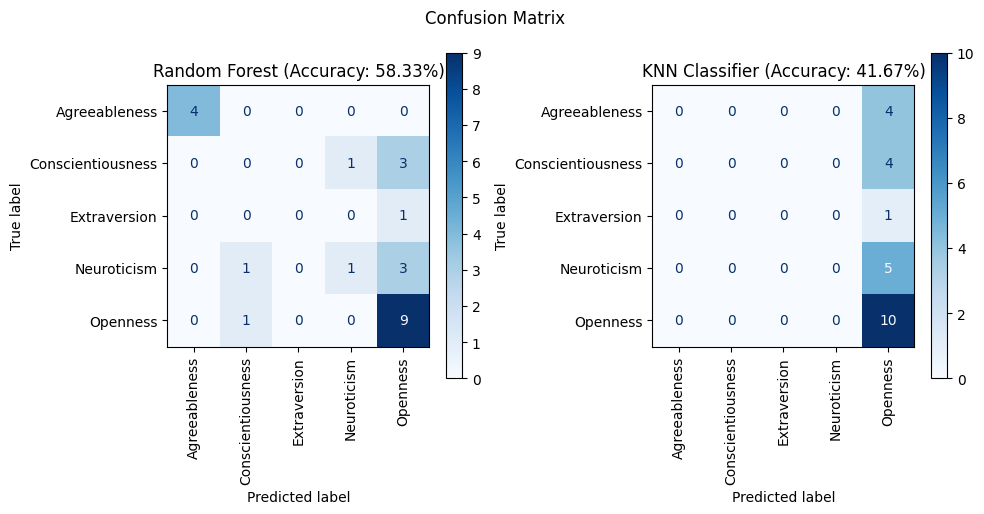

In [13]:
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp1.plot(ax=ax1, xticks_rotation="vertical", cmap="Blues")

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp2.plot(ax=ax2, xticks_rotation="vertical", cmap="Blues")

ax1.set_title(f"Random Forest (Accuracy: {accuracy_rf}%)")
ax2.set_title(f"KNN Classifier (Accuracy: {accuracy_knn}%)")

fig.suptitle("Confusion Matrix")
fig.tight_layout()
plt.show()

## Assessment Metrics

In [14]:
from sklearn.metrics import classification_report

### Random Forest

In [15]:
report_rf = classification_report(y_test, y_pred_rf, labels=rf.classes_, output_dict=True, zero_division=0)
report_df1 = pd.DataFrame(report_rf)
report_df1.transpose()

,precision,recall,f1-score,support
Agreeableness,1.000000,1.000000,1.000000,4.000000
Conscientiousness,0.000000,0.000000,0.000000,4.000000
Extraversion,0.000000,0.000000,0.000000,1.000000
Neuroticism,0.500000,0.200000,0.285714,5.000000
Openness,0.562500,0.900000,0.692308,10.000000
accuracy,0.583333,0.583333,0.583333,0.583333
macro avg,0.412500,0.420000,0.395604,24.000000
weighted avg,0.505208,0.583333,0.514652,24.000000


### KNN

In [17]:
report_knn = classification_report(y_test, y_pred_knn, labels=knn.classes_, output_dict=True, zero_division=0)
report_df2 = pd.DataFrame(report_knn)
report_df2.transpose()

,precision,recall,f1-score,support
Agreeableness,0.000000,0.000000,0.000000,4.000000
Conscientiousness,0.000000,0.000000,0.000000,4.000000
Extraversion,0.000000,0.000000,0.000000,1.000000
Neuroticism,0.000000,0.000000,0.000000,5.000000
Openness,0.416667,1.000000,0.588235,10.000000
accuracy,0.416667,0.416667,0.416667,0.416667
macro avg,0.083333,0.200000,0.117647,24.000000
weighted avg,0.173611,0.416667,0.245098,24.000000
